In [1]:
# Render our plots inline
%matplotlib inline
%pylab inline  
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab


Populating the interactive namespace from numpy and matplotlib


In [2]:
# General Plotting Parameters
mpl.rcParams['figure.figsize'] = (8,5)
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['font.size'] = 14.
mpl.rcParams['legend.fontsize'] = 12.
mpl.rcParams['axes.labelsize'] = 12.
mpl.rcParams['xtick.labelsize'] = 10.
mpl.rcParams['ytick.labelsize'] = 10.
mpl.rcParams['xtick.minor.pad'] = 4
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'
#Git says this is patched, but it doesn't work from Pip --upgrade 26-mar-2015
#mpl.rcParams['xtick.minor.visible'] = True  

# These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14),
             (255, 187, 120), (44, 160, 44), (152, 223, 138),
              (148, 103, 189),
             (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127),
             (199, 199, 199), (188, 189, 34), (219, 219, 141),
             (23, 190, 207), (158, 218, 229),(214, 39, 40), (255, 152, 150)]  
    
# Scale the RGB values to the [0, 1] range,
# which is the format matplotlib accepts.  
for i in range(len(tableau20)): 
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  

# Specific Plotting Params
i_fuel = 0
i_divert = 2
i_loss = 4
i_waste = 6

ps = 0

Look at Pu Reprocessing with Separations Facility.
Case 1: Pu is diverted with random frequency at constant amplitude.

In [3]:
dir = 'data/testing/random_sep/'

In [4]:
ran_17 = dir + '17_random2x.sqlite.dat' #pu_fuel_fab
ran_18 = dir + '18_random2x.sqlite.dat' # divertor
ran_19 = dir + '19_random2x.sqlite.dat' # environ_losses
ran_20 = dir + '20_random2x.sqlite.dat' # waste

# Using negative values in xml file. won't work with cyclist but looks identical to hard-coded version above
#ran_17 = dir + '17_random_neg2.sqlite.dat' #pu_fuel_fab
#ran_18 = dir + '18_random_neg2.sqlite.dat' # divertor
#ran_19 = dir + '19_random_neg2.sqlite.dat' # environ_losses
#ran_20 = dir + '20_random_neg2.sqlite.dat' # waste

base_17 = dir + '17_random2x_ref.sqlite.dat' #pu_fuel_fab
base_18 = dir + '18_random2x_ref.sqlite.dat' # divertor
base_19 = dir + '19_random2x_ref.sqlite.dat' # environ_losses
base_20 = dir + '20_random2x_ref.sqlite.dat' # waste


raw_ran_17 = pd.read_csv(ran_17,sep='\s+')
raw_ran_18 = pd.read_csv(ran_18,sep='\s+')
raw_ran_19 = pd.read_csv(ran_19,sep='\s+')
raw_ran_20 = pd.read_csv(ran_20,sep='\s+')

raw_base_17 = pd.read_csv(base_17,sep='\s+')
raw_base_18 = pd.read_csv(base_18,sep='\s+')
raw_base_19 = pd.read_csv(base_19,sep='\s+')
raw_base_20 = pd.read_csv(base_20,sep='\s+')

In [5]:
fuel_tp = raw_ran_17['Quantity'] - raw_ran_17['Quantity'].shift(1)
diverted_tp = raw_ran_18['Quantity'] - raw_ran_18['Quantity'].shift(1)
losses_tp = raw_ran_19['Quantity'] - raw_ran_19['Quantity'].shift(1)
waste_tp = raw_ran_20['Quantity'] - raw_ran_20['Quantity'].shift(1)

fuel_base_tp = raw_base_17['Quantity'] - raw_base_17['Quantity'].shift(1)
diverted_base_tp = raw_base_18['Quantity'] - raw_base_18['Quantity'].shift(1)
losses_base_tp = raw_base_19['Quantity'] - raw_base_19['Quantity'].shift(1)
waste_base_tp = raw_base_20['Quantity'] - raw_base_20['Quantity'].shift(1)


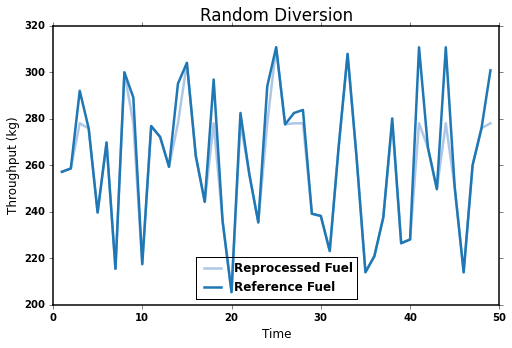

In [6]:
plt.plot(raw_ran_17['Time'],(fuel_tp), label='Reprocessed Fuel', color=tableau20[i_fuel+1])
plt.plot(raw_base_17['Time'],(fuel_base_tp), label='Reference Fuel', color=tableau20[i_fuel])

plt.legend(loc = 'best')
plt.xlabel('Time')
plt.ylabel('Throughput (kg)')
plt.title("Random Diversion")

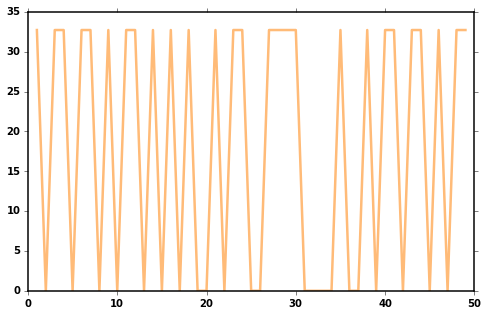

In [7]:
plt.plot(raw_ran_18['Time'],(diverted_tp), label='Diverted Pu', color=tableau20[i_divert+1])


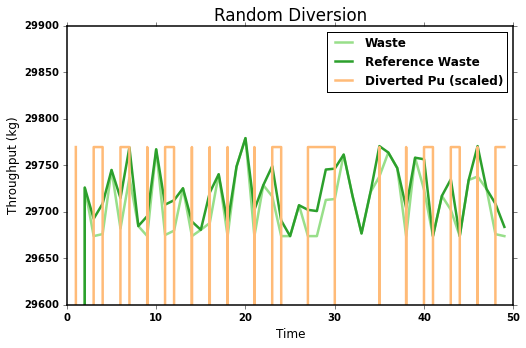

In [8]:
ylim(29600,29900)

plt.plot(raw_ran_19['Time'],(waste_tp), label='Waste', color=tableau20[i_loss+1])
plt.plot(raw_base_19['Time'],(waste_base_tp), label='Reference Waste', color=tableau20[i_loss])
plt.plot(raw_ran_18['Time'],(diverted_tp)*910, label='Diverted Pu (scaled)', color=tableau20[i_divert+1])

plt.legend(loc = 'best')
plt.xlabel('Time')
plt.ylabel('Throughput (kg)')
plt.title("Random Diversion")



In [9]:
sran_17 = dir + '17_random2xsigma02.sqlite.dat' #pu_fuel_fab
sran_18 = dir + '18_random2xsigma02.sqlite.dat' # divertor
sran_19 = dir + '19_random2xsigma02.sqlite.dat' # environ_losses
sran_20 = dir + '20_random2xsigma02.sqlite.dat' # waste

sbase_17 = dir + '17_random2xsigma02_ref.sqlite.dat' #pu_fuel_fab
sbase_18 = dir + '18_random2xsigma02_ref.sqlite.dat' # divertor
sbase_19 = dir + '19_random2xsigma02_ref.sqlite.dat' # environ_losses
sbase_20 = dir + '20_random2xsigma02_ref.sqlite.dat' # waste


raw_sran_17 = pd.read_csv(sran_17,sep='\s+')
raw_sran_18 = pd.read_csv(sran_18,sep='\s+')
raw_sran_19 = pd.read_csv(sran_19,sep='\s+')
raw_sran_20 = pd.read_csv(sran_20,sep='\s+')

raw_sbase_17 = pd.read_csv(sbase_17,sep='\s+')
raw_sbase_18 = pd.read_csv(sbase_18,sep='\s+')
raw_sbase_19 = pd.read_csv(sbase_19,sep='\s+')
raw_sbase_20 = pd.read_csv(sbase_20,sep='\s+')

In [10]:
s_fuel_tp = raw_sran_17['Quantity'] - raw_sran_17['Quantity'].shift(1)
s_diverted_tp = raw_sran_18['Quantity'] - raw_sran_18['Quantity'].shift(1)
s_losses_tp = raw_sran_19['Quantity'] - raw_sran_19['Quantity'].shift(1)
s_waste_tp = raw_sran_20['Quantity'] - raw_sran_20['Quantity'].shift(1)

s_fuel_base_tp = raw_sbase_17['Quantity'] - raw_sbase_17['Quantity'].shift(1)
s_diverted_base_tp = raw_sbase_18['Quantity'] - raw_sbase_18['Quantity'].shift(1)
s_losses_base_tp = raw_sbase_19['Quantity'] - raw_sbase_19['Quantity'].shift(1)
s_waste_base_tp = raw_sbase_20['Quantity'] - raw_sbase_20['Quantity'].shift(1)


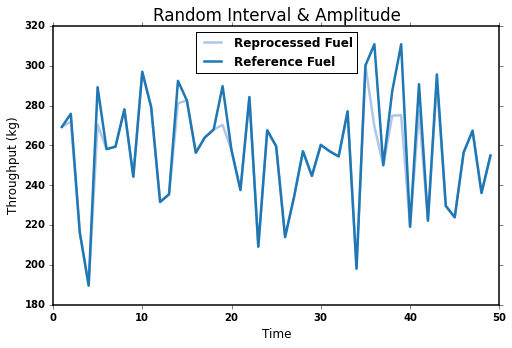

In [11]:
plt.plot(raw_sran_17['Time'],(s_fuel_tp), label='Reprocessed Fuel', color=tableau20[i_fuel+1])
plt.plot(raw_sbase_17['Time'],(s_fuel_base_tp), label='Reference Fuel', color=tableau20[i_fuel])

plt.legend(loc = 'best')
plt.xlabel('Time')
plt.ylabel('Throughput (kg)')
plt.title("Random Interval & Amplitude")

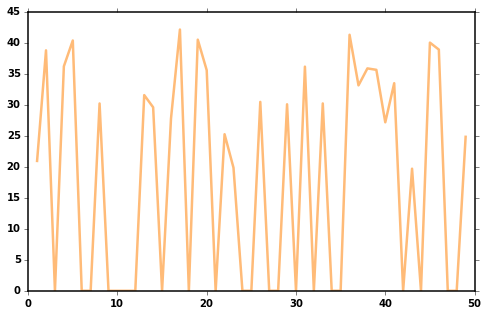

In [12]:
plt.plot(raw_sran_18['Time'],(s_diverted_tp), label='Diverted Pu', color=tableau20[i_divert+1])


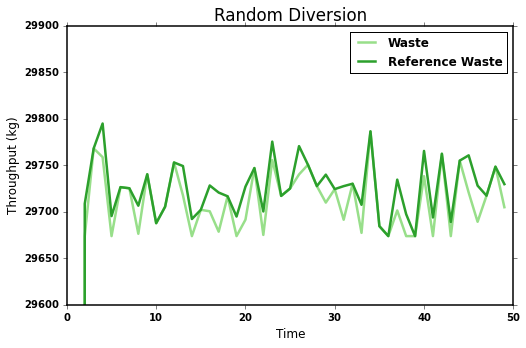

In [13]:
ylim(29600,29900)

plt.plot(raw_sran_19['Time'],(s_waste_tp), label='Waste', color=tableau20[i_loss+1])
plt.plot(raw_sbase_19['Time'],(s_waste_base_tp), label='Reference Waste', color=tableau20[i_loss])
#plt.plot(raw_sran_18['Time'],(s_diverted_tp)*900, label='Diverted Pu (scaled)', color=tableau20[i_divert+1])

plt.legend(loc = 'best')
plt.xlabel('Time')
plt.ylabel('Throughput (kg)')
plt.title("Random Diversion")

